# Compression Report

In [1]:
import os
import json 
import subprocess
import importlib

import xbitinfo as xb
import xarray as xr
import utils

In [2]:
# load changes without restarting the notebook
importlib.reload(utils);

---

In [3]:
# load data
path_to_data = 'data/data.nc'  # change this
ds = xr.open_dataset(path_to_data)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2023-05-01T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-09 21:24:32 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [5]:
# get information content per bit
info_per_bit = xb.get_bitinformation(ds, dim="longitude", implementation="python");
# ?? dim
# ipywidgets warnings

  0%|          | 0/3 [00:00<?, ?it/s]

/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [6]:
# get keepbits
keepbits = xb.get_keepbits(info_per_bit, 0.99)

In [7]:
# apply bitrounding
ds_bitrounded = xb.xr_bitround(ds, keepbits)

---

In [8]:
utils.save2ncdf(ds, ds_bitrounded)
utils.save2zarr(ds, ds_bitrounded)

---

In [9]:
sdata = {
    'ncdf': utils.get_size('nc'),
    'zarr': utils.get_size('zarr')
}

In [10]:
sdata

{'ncdf': {'bitr_comp': 4836, 'comp': 3672, 'ori': 38028},
 'zarr': {'bitr_comp': 6064, 'comp': 14060, 'ori': 76520}}

---

In [11]:
import pandas as pd

df = pd.DataFrame(sdata)
df

,ncdf,zarr
bitr_comp,4836,6064
comp,3672,14060
ori,38028,76520


---

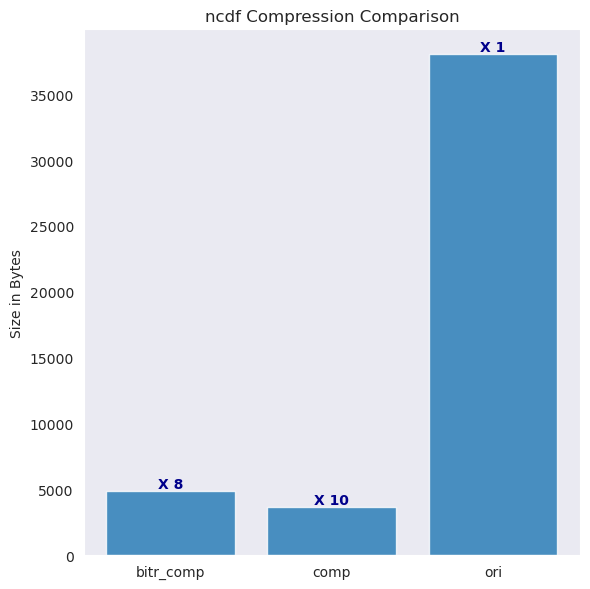

In [12]:
utils.plot_ratio(df, type_='ncdf')

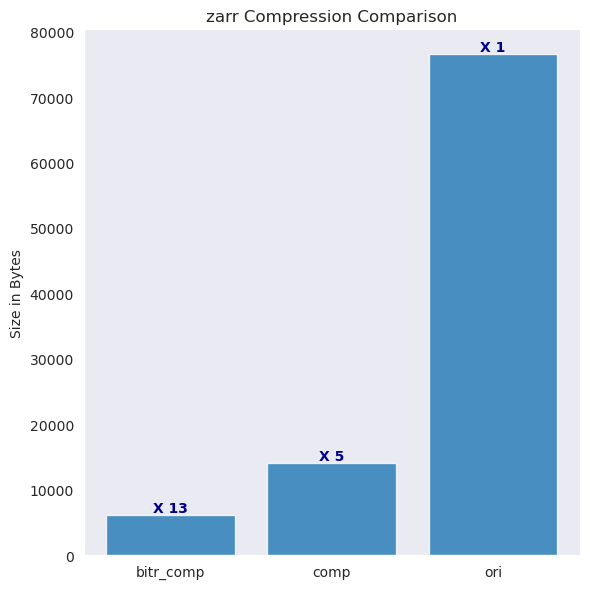

In [13]:
utils.plot_ratio(df, type_='zarr')

In [14]:
# CLEAN
!rm *.nc
!rm -r *.zarr